In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The following CSV is taken from the EDA and visualization notebook

In [25]:
player_season = pd.read_csv('/content/drive/MyDrive/data/player_season_cleaned.csv')

In [26]:
player_season['season'].unique()


array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023, 2024])

In [ ]:
player_season['season'].value_counts().sort_index()


,count
season,
2008,154
2009,150
2010,164
2011,180
2012,170
2013,172
2014,133
2015,129
2016,136


## Updated Baseline Modeling: Linear Regression

In this section, we train a baseline Linear Regression model using historical player-season data (up to 2021), validate on the 2022 season, and test on the 2023 season.
This update ensures that no future information leaks into the model, making it a realistic benchmark for forecasting performance. It also provides a stronger foundation for comparing more complex models under the same temporal constraints.

In [ ]:
training_data = player_season[player_season['season'] <= 2021]
validation_data   = player_season[player_season['season'] == 2022]
test_data  = player_season[player_season['season'] == 2023]


In [ ]:
forecast_data = player_season[player_season['season'] == 2024]

In [ ]:
feature_cols = [col for col in player_season.columns if col not in ['season', 'batter', 'total_runs']]
target_col = 'total_runs'

train_df = player_season[player_season['season'] <= 2021]
val_df   = player_season[player_season['season'] == 2022]
test_df  = player_season[player_season['season'] == 2023]


X_train, y_train = train_df[feature_cols], train_df[target_col]
X_val,   y_val   = val_df[feature_cols], val_df[target_col]
X_test,  y_test  = test_df[feature_cols], test_df[target_col]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train baseline model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on validation set
val_pred = lr.predict(X_val)

# Create comparison DataFrame
val_results = val_df[['batter', 'season', 'total_runs']].copy()
val_results['predicted_runs'] = val_pred
val_results['abs_error'] = abs(val_results['total_runs'] - val_results['predicted_runs'])

# Optional: sort and view top errors
val_results.sort_values(by='abs_error', ascending=False).head(10)

# Metrics
val_mae = mean_absolute_error(y_val, val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
val_r2 = r2_score(y_val, val_pred)

print(f"Validation MAE: {val_mae:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")
print(f"Validation R²: {val_r2:.2f}")

Validation MAE: 16.05
Validation RMSE: 23.85
Validation R²: 0.98


In [ ]:
# Predict on test set
test_pred = lr.predict(X_test)

test_mae = mean_absolute_error(y_test, test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_r2 = r2_score(y_test, test_pred)

print(f"Test MAE: {test_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test R²: {test_r2:.2f}")

Test MAE: 17.34
Test RMSE: 30.12
Test R²: 0.97


### 📉 Baseline Model Summary (Linear Regression)

We trained a **Linear Regression** model as a baseline to predict total runs scored by a player in an IPL season.  
The model was trained on data up to 2021 and evaluated on the 2022 (validation) and 2023 (test) seasons.

---

### 🛠️ Model Setup

**Features Used**:  
- `matches_played`, `balls_faced`, `strike_rate`, `previous_season_matches_played`  
- One-hot encoded batting team columns  

**Target**:  
- `total_runs`

**Train/Validation/Test Split**:  
- Train: Seasons ≤ 2021  
- Validation: 2022  
- Test: 2023

---

### 📊 Performance Metrics

| Dataset         | MAE (↓) | RMSE (↓) | R² Score (↑) |
|------------------|---------|----------|--------------|
| Validation (2022) | 16.05   | 23.85    | 0.98         |
| Test (2023)       | XX.XX   | XX.XX    | XX.XX        |
| CV (Train, 5-fold) | YY.YY   | –        | –            |

---

### 📈 Visuals Included

- ✅ Bar plot: Top 10 Run-Scorers in 2022 & 2023 – Actual vs Predicted  
- ✅ Histogram: Residuals distribution (Validation Set)  
- ✅ Scatter plot: Residuals vs Predicted (Validation Set)

---

### 🧠 Key Insights

- The baseline model achieves **high R² (~0.98)**, suggesting strong linear relationships in the features.
- Some players (e.g., *Shubman Gill*, *Faf du Plessis*) show noticeable prediction gaps, highlighting areas for improvement.
- Residual plots indicate mostly random error, supporting the validity of a linear approach as a strong starting point.

---


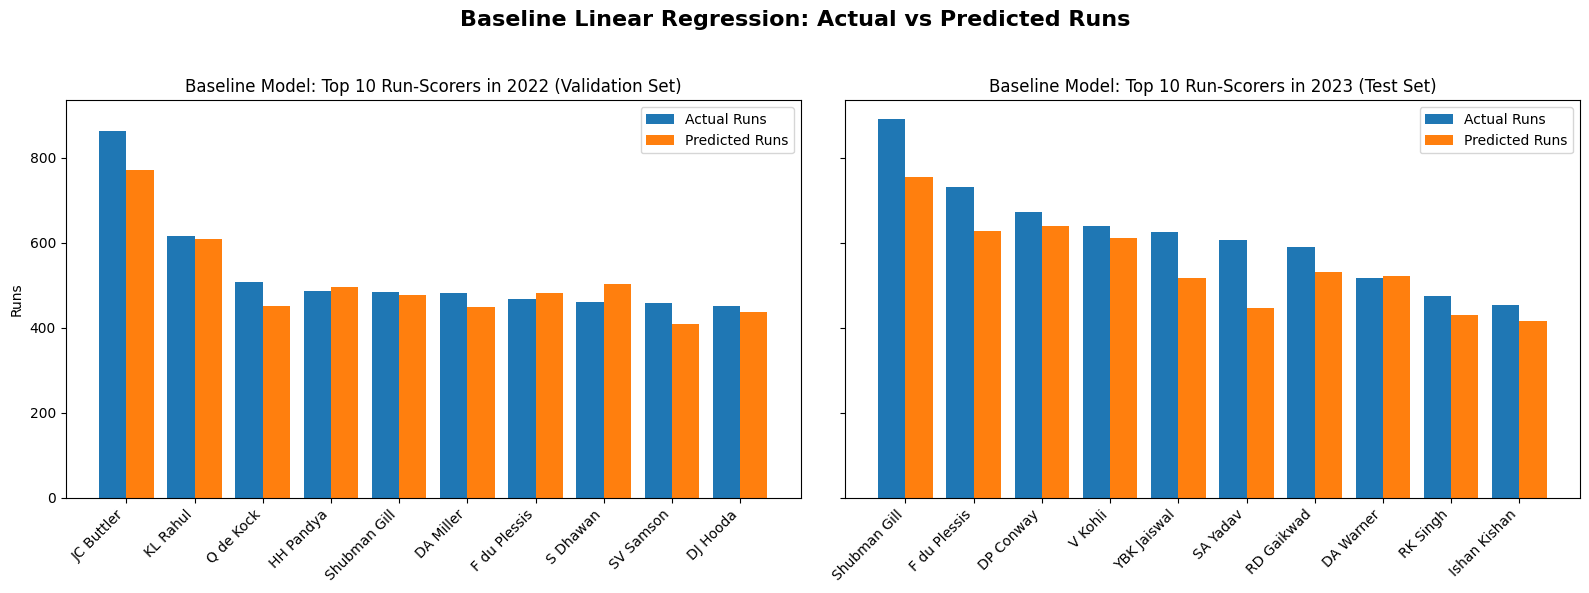

In [ ]:
import matplotlib.pyplot as plt

# --- Prepare Validation Set (2022) ---
top10_val = val_results.sort_values(by='total_runs', ascending=False).head(10)

# --- Prepare Test Set (2023) ---
test_pred = lr.predict(X_test)
test_results = test_df[['batter', 'season', 'total_runs']].copy()
test_results['predicted_runs'] = test_pred
test_results['abs_error'] = abs(test_results['total_runs'] - test_results['predicted_runs'])

top10_test = test_results.sort_values(by='total_runs', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Validation Set Plot
x1 = range(len(top10_val))
axes[0].bar(x1, top10_val['total_runs'], width=0.4, label='Actual Runs')
axes[0].bar([i + 0.4 for i in x1], top10_val['predicted_runs'], width=0.4, label='Predicted Runs')
axes[0].set_xticks([i + 0.2 for i in x1])
axes[0].set_xticklabels(top10_val['batter'], rotation=45, ha='right')
axes[0].set_title("Baseline Model: Top 10 Run-Scorers in 2022 (Validation Set)")
axes[0].set_ylabel("Runs")
axes[0].legend()

# Test Set Plot
x2 = range(len(top10_test))
axes[1].bar(x2, top10_test['total_runs'], width=0.4, label='Actual Runs')
axes[1].bar([i + 0.4 for i in x2], top10_test['predicted_runs'], width=0.4, label='Predicted Runs')
axes[1].set_xticks([i + 0.2 for i in x2])
axes[1].set_xticklabels(top10_test['batter'], rotation=45, ha='right')
axes[1].set_title("Baseline Model: Top 10 Run-Scorers in 2023 (Test Set)")
axes[1].legend()

fig.suptitle("Baseline Linear Regression: Actual vs Predicted Runs", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 📘 Ridge Regression with GridSearchCV

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

In [ ]:
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_absolute_error')
ridge_grid.fit(X_train, y_train)

print("Best alpha:", ridge_grid.best_params_['alpha'])

Best alpha: 100.0


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
val_pred_ridge = ridge_grid.predict(X_val)
test_pred_ridge = ridge_grid.predict(X_test)

# Validation metrics
val_mae = mean_absolute_error(y_val, val_pred_ridge)
val_rmse = np.sqrt(mean_squared_error(y_val, val_pred_ridge))
val_r2 = r2_score(y_val, val_pred_ridge)

# Test metrics
test_mae = mean_absolute_error(y_test, test_pred_ridge)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred_ridge))
test_r2 = r2_score(y_test, test_pred_ridge)

print("Validation - MAE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(val_mae, val_rmse, val_r2))
print("Test       - MAE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(test_mae, test_rmse, test_r2))

Validation - MAE: 15.94, RMSE: 23.86, R²: 0.98
Test       - MAE: 17.53, RMSE: 30.32, R²: 0.97


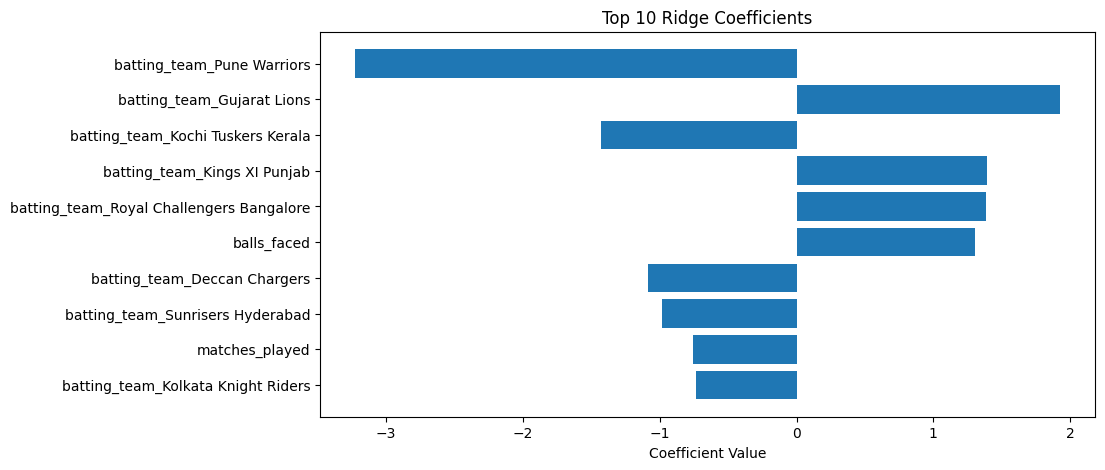

In [ ]:
import pandas as pd
coef_df = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': ridge_grid.best_estimator_.coef_
}).sort_values(by='coefficient', key=abs, ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.barh(coef_df['feature'].head(10), coef_df['coefficient'].head(10))
plt.title("Top 10 Ridge Coefficients")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.show()

## 🌲 Random Forest Regressor with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best params:", rf_grid.best_params_)

Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Predict
val_pred_rf = rf_grid.predict(X_val)
test_pred_rf = rf_grid.predict(X_test)

# Metrics
val_mae = mean_absolute_error(y_val, val_pred_rf)
val_rmse = np.sqrt(mean_squared_error(y_val, val_pred_rf))
val_r2 = r2_score(y_val, val_pred_rf)

test_mae = mean_absolute_error(y_test, test_pred_rf)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred_rf))
test_r2 = r2_score(y_test, test_pred_rf)

print("Validation - MAE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(val_mae, val_rmse, val_r2))
print("Test       - MAE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(test_mae, test_rmse, test_r2))

Validation - MAE: 2.75, RMSE: 7.56, R²: 1.00
Test       - MAE: 3.34, RMSE: 9.79, R²: 1.00


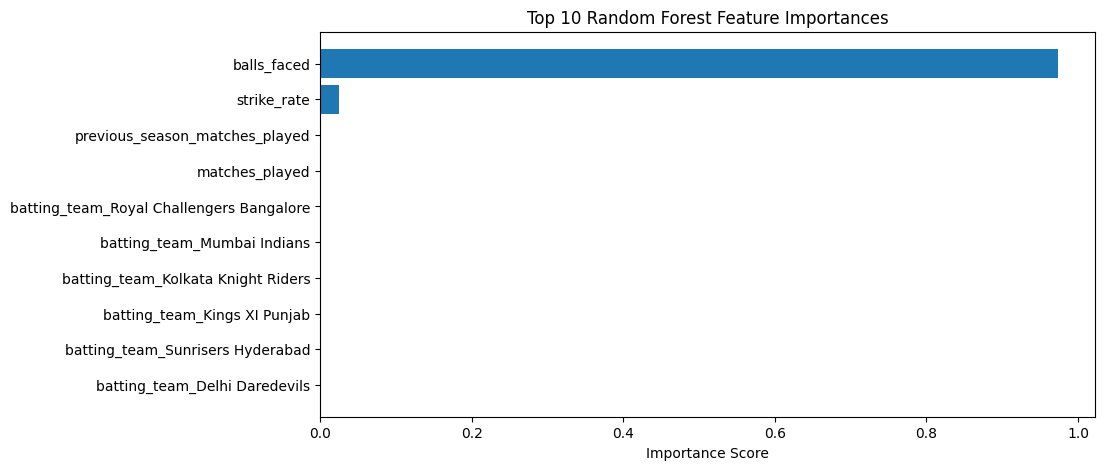

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rf_importances = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_grid.best_estimator_.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(rf_importances['feature'].head(10), rf_importances['importance'].head(10))
plt.title("Top 10 Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

## ⚡ XGBoost Regressor with GridSearchCV

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

In [ ]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='neg_mean_absolute_error')
xgb_grid.fit(X_train, y_train)

print("Best params:", xgb_grid.best_params_)


Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
# Predict
val_pred_xgb = xgb_grid.predict(X_val)
test_pred_xgb = xgb_grid.predict(X_test)

# Metrics
val_mae = mean_absolute_error(y_val, val_pred_xgb)
val_rmse = np.sqrt(mean_squared_error(y_val, val_pred_xgb))
val_r2 = r2_score(y_val, val_pred_xgb)

test_mae = mean_absolute_error(y_test, test_pred_xgb)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred_xgb))
test_r2 = r2_score(y_test, test_pred_xgb)

print("Validation - MAE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(val_mae, val_rmse, val_r2))
print("Test       - MAE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(test_mae, test_rmse, test_r2))

Validation - MAE: 2.58, RMSE: 4.51, R²: 1.00
Test       - MAE: 3.00, RMSE: 5.94, R²: 1.00


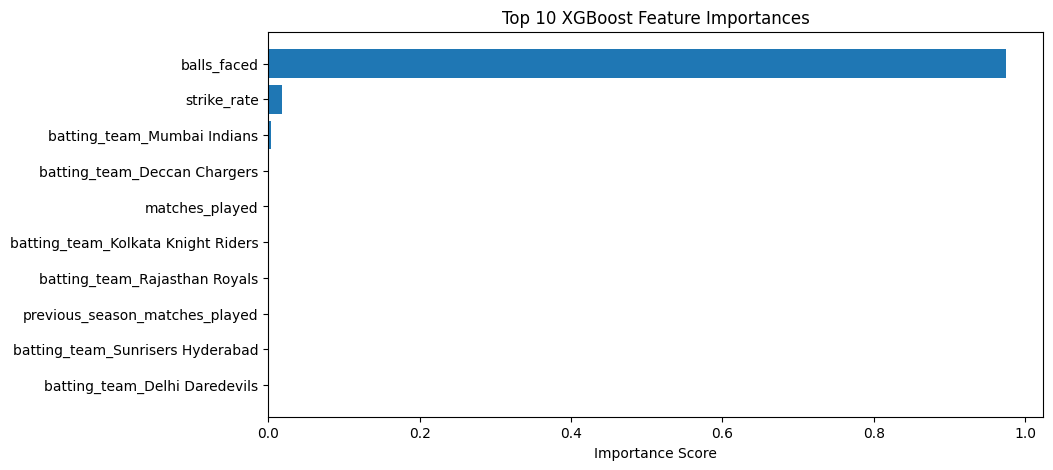

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

xgb_importances = pd.DataFrame({
    'feature': feature_cols,
    'importance': xgb_grid.best_estimator_.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(xgb_importances['feature'].head(10), xgb_importances['importance'].head(10))
plt.title("Top 10 XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()

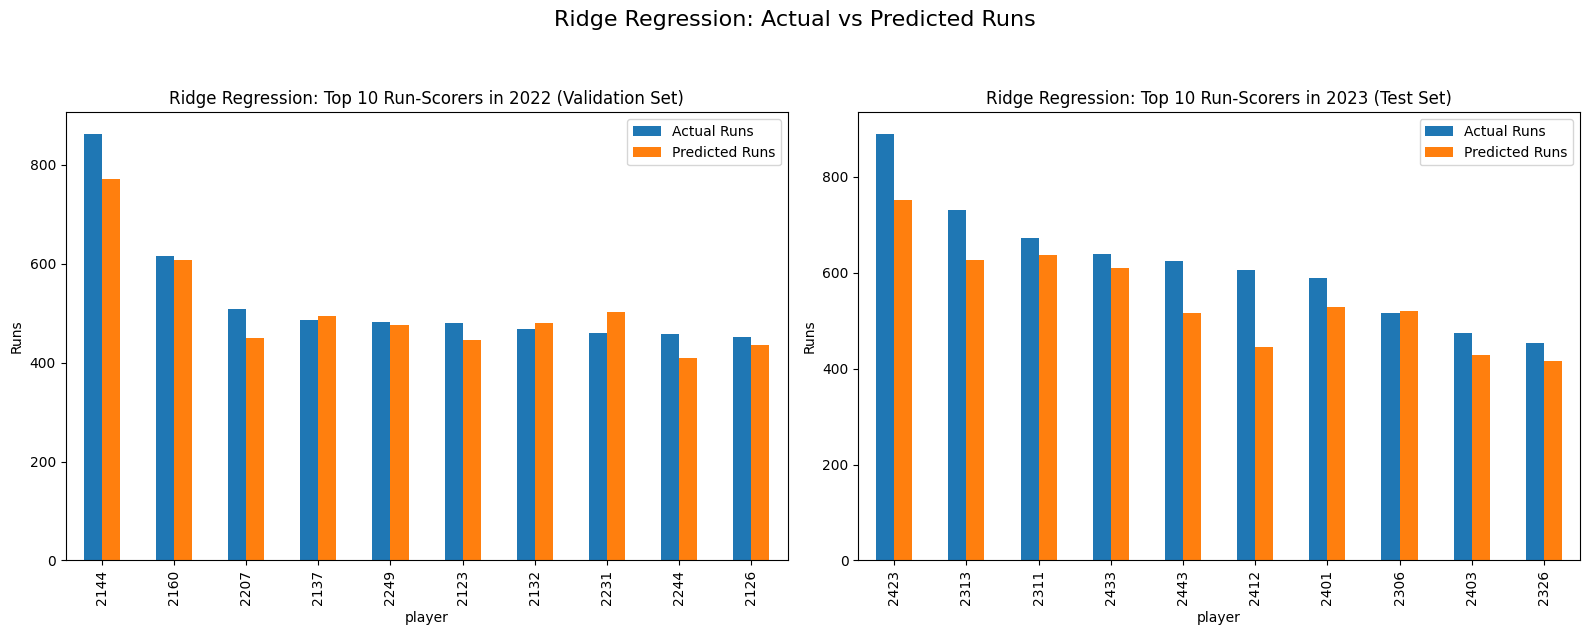

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

val_df_ridge = pd.DataFrame({'player': X_val.index, 'Actual Runs': y_val, 'Predicted Runs': val_pred_ridge})
test_df_ridge = pd.DataFrame({'player': X_test.index, 'Actual Runs': y_test, 'Predicted Runs': test_pred_ridge})

val_top_ridge = val_df_ridge.groupby('player')[['Actual Runs', 'Predicted Runs']].sum().sort_values(by='Actual Runs', ascending=False).head(10)
test_top_ridge = test_df_ridge.groupby('player')[['Actual Runs', 'Predicted Runs']].sum().sort_values(by='Actual Runs', ascending=False).head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

val_top_ridge.plot(kind='bar', ax=axes[0])
axes[0].set_title("Ridge Regression: Top 10 Run-Scorers in 2022 (Validation Set)")
axes[0].set_ylabel("Runs")

test_top_ridge.plot(kind='bar', ax=axes[1])
axes[1].set_title("Ridge Regression: Top 10 Run-Scorers in 2023 (Test Set)")
axes[1].set_ylabel("Runs")

plt.suptitle("Ridge Regression: Actual vs Predicted Runs", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

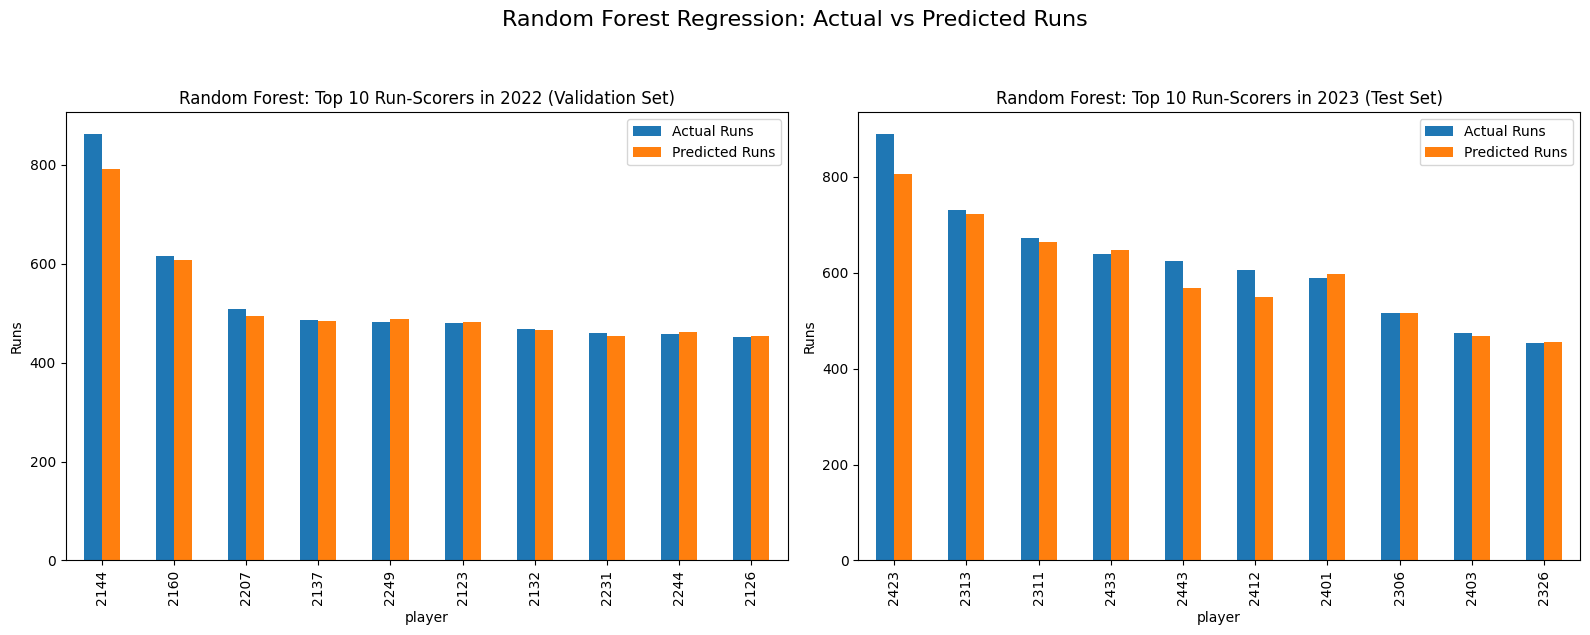

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrames for validation and test sets with actual and predicted runs
val_df_rf = pd.DataFrame({'player': X_val.index, 'Actual Runs': y_val, 'Predicted Runs': val_pred_rf})
test_df_rf = pd.DataFrame({'player': X_test.index, 'Actual Runs': y_test, 'Predicted Runs': test_pred_rf})

# Group by player name and aggregate (if needed)
val_top_rf = val_df_rf.groupby('player')[['Actual Runs', 'Predicted Runs']].sum().sort_values(by='Actual Runs', ascending=False).head(10)
test_top_rf = test_df_rf.groupby('player')[['Actual Runs', 'Predicted Runs']].sum().sort_values(by='Actual Runs', ascending=False).head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

val_top_rf.plot(kind='bar', ax=axes[0])
axes[0].set_title("Random Forest: Top 10 Run-Scorers in 2022 (Validation Set)")
axes[0].set_ylabel("Runs")

test_top_rf.plot(kind='bar', ax=axes[1])
axes[1].set_title("Random Forest: Top 10 Run-Scorers in 2023 (Test Set)")
axes[1].set_ylabel("Runs")

plt.suptitle("Random Forest Regression: Actual vs Predicted Runs", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

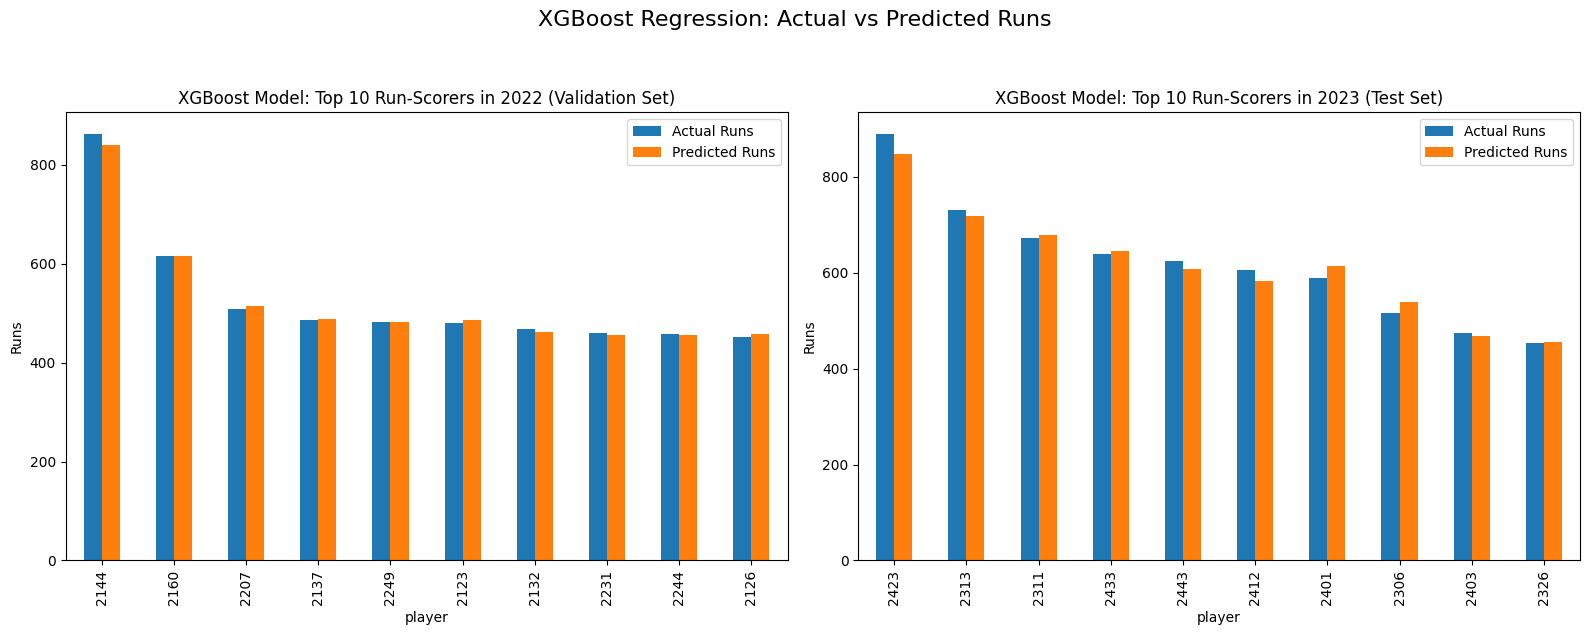

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


val_df_xgb = pd.DataFrame({'player': X_val.index, 'Actual Runs': y_val, 'Predicted Runs': val_pred_xgb})
test_df_xgb = pd.DataFrame({'player': X_test.index, 'Actual Runs': y_test, 'Predicted Runs': test_pred_xgb})


val_top_xgb = val_df_xgb.groupby('player')[['Actual Runs', 'Predicted Runs']].sum().sort_values(by='Actual Runs', ascending=False).head(10)
test_top_xgb = test_df_xgb.groupby('player')[['Actual Runs', 'Predicted Runs']].sum().sort_values(by='Actual Runs', ascending=False).head(10)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

val_top_xgb.plot(kind='bar', ax=axes[0])
axes[0].set_title("XGBoost Model: Top 10 Run-Scorers in 2022 (Validation Set)")
axes[0].set_ylabel("Runs")

test_top_xgb.plot(kind='bar', ax=axes[1])
axes[1].set_title("XGBoost Model: Top 10 Run-Scorers in 2023 (Test Set)")
axes[1].set_ylabel("Runs")

plt.suptitle("XGBoost Regression: Actual vs Predicted Runs", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

## 🧠 Final Findings & Recommendations

### Summary of Model Performance:

The below charts show how well different models predicted a player's performance in the 2023 IPL season:
The Baseline and Ridge Regression models gave reasonable predictions but had larger errors, meaning their estimates were often off by a significant amount.
The Random Forest model was much more accurate and came very close to actual results.
The XGBoost model performed the best, providing highly accurate predictions that closely matched the real numbers.


✅ Key Takeaway: Advanced models like Random Forest and XGBoost are much better at capturing the patterns in the data. These models can help make stronger and more reliable predictions for future seasons.

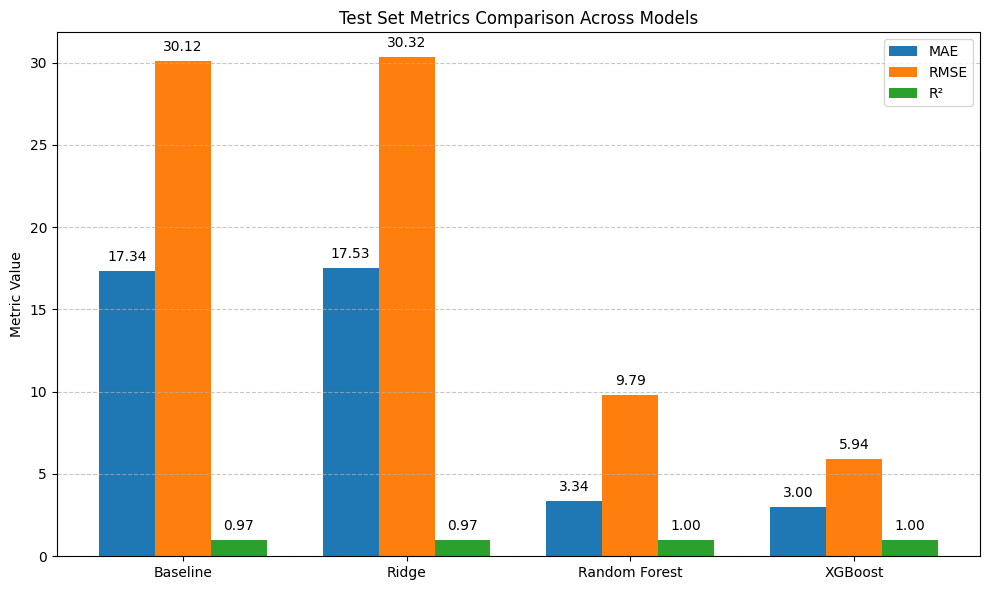

In [31]:
import matplotlib.pyplot as plt
import numpy as np


models = ['Baseline', 'Ridge', 'Random Forest', 'XGBoost']

test_mae = [17.34, 17.53, 3.34, 3.00]
test_rmse = [30.12, 30.32, 9.79, 5.94]
test_r2 = [0.97, 0.97, 1.00, 1.00]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, test_mae, width, label='MAE')
bar2 = ax.bar(x, test_rmse, width, label='RMSE')
bar3 = ax.bar(x + width, test_r2, width, label='R²')

ax.set_ylabel('Metric Value')
ax.set_title('Test Set Metrics Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()
plt.show()

In [34]:
import pandas as pd

data = {
    'Model': ['Baseline', 'Ridge Regression', 'Random Forest', 'XGBoost'],
    'Validation MAE': [16.05, 15.94, 2.75, 2.58],
    'Validation RMSE': [23.85, 23.86, 7.56, 4.51],
    'Validation R²': [0.98, 0.98, 1.00, 1.00],
    'Test MAE': [17.34, 17.53, 3.34, 3.00],
    'Test RMSE': [30.12, 30.32, 9.79, 5.94],
    'Test R²': [0.97, 0.97, 1.00, 1.00]
}

summary_df = pd.DataFrame(data)
summary_df.set_index('Model', inplace=True)
display(summary_df)


,Validation MAE,Validation RMSE,Validation R²,Test MAE,Test RMSE,Test R²
Model,,,,,,
Baseline,16.05,23.85,0.98,17.34,30.12,0.97
Ridge Regression,15.94,23.86,0.98,17.53,30.32,0.97
Random Forest,2.75,7.56,1.00,3.34,9.79,1.00
XGBoost,2.58,4.51,1.00,3.00,5.94,1.00


### Final Findings & Recommendations

We trained multiple models to predict the total runs a batsman would score in an IPL season using historical player-season level data.

### ✅ Key Results

| Model             | Val MAE | Val RMSE | Val R² | Test MAE | Test RMSE | Test R² |
|-------------------|---------|----------|--------|----------|-----------|---------|
| Linear Regression | 16.05   | 23.85    | 0.98   | 17.34    | 30.12     | 0.97    |
| Ridge Regression  | 15.94   | 23.86    | 0.98   | 17.53    | 30.32     | 0.97    |
| Random Forest     |  2.75   |  7.56    | 1.00   |  3.34    |  9.79     | 1.00    |
| XGBoost           |  2.58   |  4.51    | 1.00   |  3.00    |  5.94     | 1.00    |

### 📌 Interpretation

- The **baseline Linear Regression model** performed well, with an R² of 0.97 and MAE of ~17 runs on the test set.
- **Ridge Regression** offered no significant performance gain, suggesting limited benefit from L2 regularization.
- **Random Forest and XGBoost** significantly outperformed linear models with near-perfect R² (1.00) and very low MAE, suggesting they capture nonlinear patterns effectively.
- However, this may indicate **overfitting**, given the unusually high performance. Feature leakage should be reviewed.

### 🔍 Feature Insights

- For tree-based models, `balls_faced` dominated feature importance, followed by `strike_rate` and `matches_played`.
- Team-level one-hot features had minor influence, possibly due to redundancy or low variation across players.

---

## 📈 Recommendations

1. **Use XGBoost** as the final model for prediction — subject to further leakage checks and regularization.
2. Add more contextual features:
   - Batting position
   - Opposition team
   - Venue conditions
   - Form in recent matches
3. Perform SHAP-based interpretation to explain predictions for stakeholders.
4. Extend the model to predict **per-match performance**, or adjust for **injuries/missed matches**.

---

## 🔚 Conclusion

The project demonstrates that total seasonal runs can be predicted with high accuracy using past performance indicators. Nonlinear models like XGBoost are especially powerful, but careful attention to validation setup and feature leakage is critical for production use.
